# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
import csv
import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import sklearn.metrics
import cv2
import itertools
import matplotlib.image as mpimg
from skimage import exposure

Using TensorFlow backend.


In [2]:
# Load pickled data

# Fill this in based on where you saved the training and testing data

training_file = r"data/train.p"
validation_file= r"data/valid.p"
testing_file = r"data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
with open('signnames.csv', 'r') as csvfile:
    signnamesReader = csv.reader(csvfile, delimiter=',', quotechar='|')
    
    signnames = {}
    for row in signnamesReader:
        if row[0].isdigit() == True:
            signnames[int(row[0])] = row[1]
print(signnames)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Below shows a basic summary for train, validation and test set.
We can see that the image bias toward some specific class, balancing class population is needed before training the network.

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = (X_train.shape[1], X_train.shape[2])
image_size = X_train.shape[1]

# How many unique classes/labels there are in the dataset.
labels = np.unique(y_train)
num_labels = len(labels)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", num_labels)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Class distribution within the provided dataset.


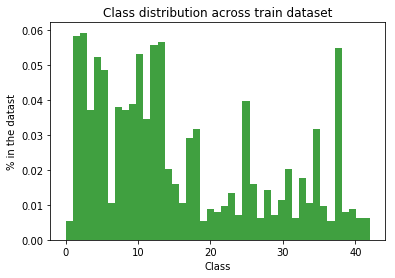

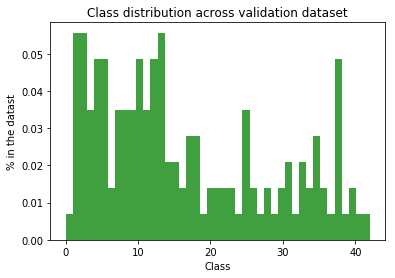

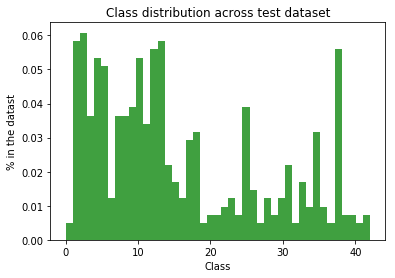

In [5]:
print("Class distribution within the provided dataset.")

plt.hist(y_train, num_labels, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Class')
plt.ylabel('% in the datast')
plt.title('Class distribution across train dataset')
plt.show()

plt.hist(y_valid, num_labels, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Class')
plt.ylabel('% in the datast')
plt.title('Class distribution across validation dataset')
plt.show()

plt.hist(y_test, num_labels, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Class')
plt.ylabel('% in the datast')
plt.title('Class distribution across test dataset')
plt.show()

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline

def displayData(X, px, py, pch, cmap=None):
    
    def reshape(X, px, py, pch, order):
        if(pch == 1):
            return X.reshape( px, py, order='F')
        else:
            return X.reshape( px, py, pch, order='F') 
        
    m = X.shape[0]
    plt.figure()
    
    if(m == 1):
        tmp = reshape(X[0,:], px, py, pch, order='F')
        plt.imshow(tmp, cmap='gray_r')
    else:
        display_rows = math.floor(math.sqrt(m))
        display_cols = math.ceil(m / display_rows)
        # set up array
        fig, axarr = plt.subplots(nrows=display_rows, ncols=display_cols,
                                  figsize=(10,10))

        # loop over randomly drawn numbers
        for ii in range(display_rows):
            for jj in range(display_cols):
                if ii*display_cols+jj >= len(X):
                    continue
                
                tmp = reshape(X[ii*display_cols+jj,:],px,py,pch, order='F')
                #axarr[ii,jj].imshow(tmp, cmap='gray_r')
                axarr[ii,jj].imshow(tmp, cmap=cmap)
                plt.setp(axarr[ii,jj].get_xticklabels(), visible=False)
                plt.setp(axarr[ii,jj].get_yticklabels(), visible=False)

        fig.subplots_adjust(hspace=0, wspace=0)

### Inspect a specific class

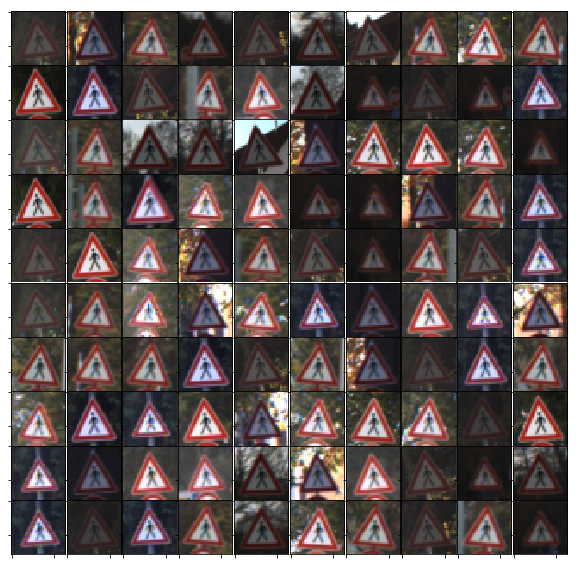

In [7]:
X_train_i = X_train[y_train == 27]
rand_indices = np.random.permutation(X_train_i.shape[0])
sel = X_train_i[rand_indices[0:100], :]

displayData(sel, 32, 32, 3)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Generating augmented data

In [8]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False
)

if not os.path.isfile('data/train_aug.p'):
    total_image_per_class = 4000
    X_train_augmented = np.empty((0,32,32,3), dtype='uint8')
    y_train_augmented = np.empty(0,dtype='uint8')
    print('Augmenting Image Data...')
    for i in tqdm(range(num_labels)):
        index = [y_train==i]
        images_for_i_class = X_train[y_train==i]
        y_i_class = y_train[y_train==i]

        X_train_augmented_i = np.copy(images_for_i_class)
        y_train_augmented_i = np.copy(y_i_class)

        for X,y in datagen.flow(images_for_i_class, y_i_class, batch_size=len(y_i_class), seed=9345+i*37):            
            X = X.astype(np.uint8)
            y = y.astype(np.uint8)
            X_train_augmented_i = np.append(X_train_augmented_i, X, axis=0)
            y_train_augmented_i = np.append(y_train_augmented_i, y, axis=0)

            if len(X_train_augmented_i) >= total_image_per_class:
                break

        X_train_augmented = np.append(X_train_augmented, X_train_augmented_i[:total_image_per_class], axis=0)
        y_train_augmented = np.append(y_train_augmented, y_train_augmented_i[:total_image_per_class], axis=0)              

    train_aug = {}
    train_aug['features'] = X_train_augmented
    train_aug['labels'] = y_train_augmented
    
    pickle.dump(train_aug, open( "data/train_aug.p", "wb" ) )
else:
    with open('data/train_aug.p', mode='rb') as f:
        train_aug = pickle.load(f)
    
    X_train_augmented, y_train_augmented = train_aug['features'], train_aug['labels']

In [9]:
print(X_train_augmented.shape, y_train_augmented.shape)

(172000, 32, 32, 3) (172000,)


Loading and Visualizing Data ...



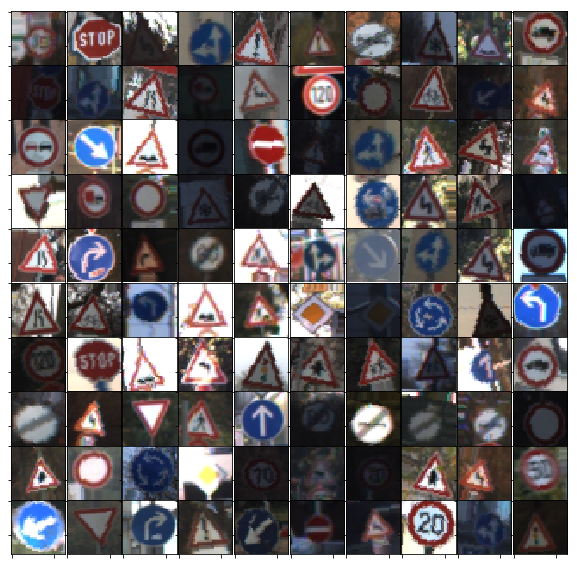

In [10]:
# Load Training Data
print('Loading and Visualizing Data ...\n')

# Randomly select 100 data points to display
rand_indices = np.random.permutation(X_train_augmented.shape[0])
sel = X_train_augmented[rand_indices[0:100], :]

displayData(sel, 32, 32, 3)

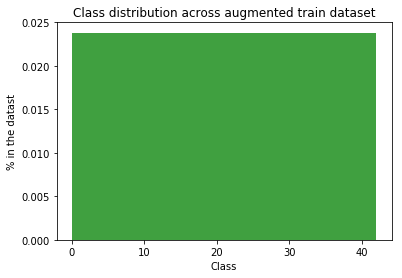

In [11]:
plt.hist(y_train_augmented, num_labels, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Class')
plt.ylabel('% in the datast')
plt.title('Class distribution across augmented train dataset')
plt.show()

#### Pre-process of dataset

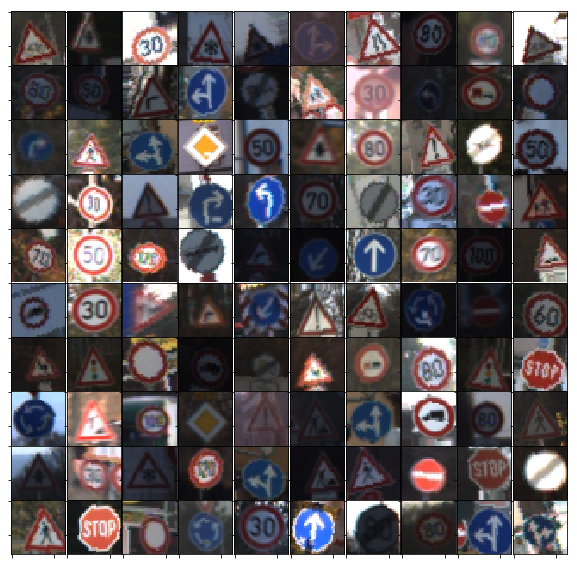

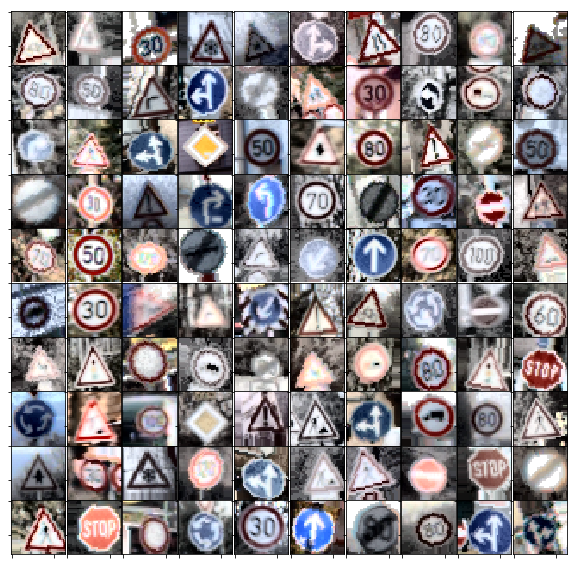

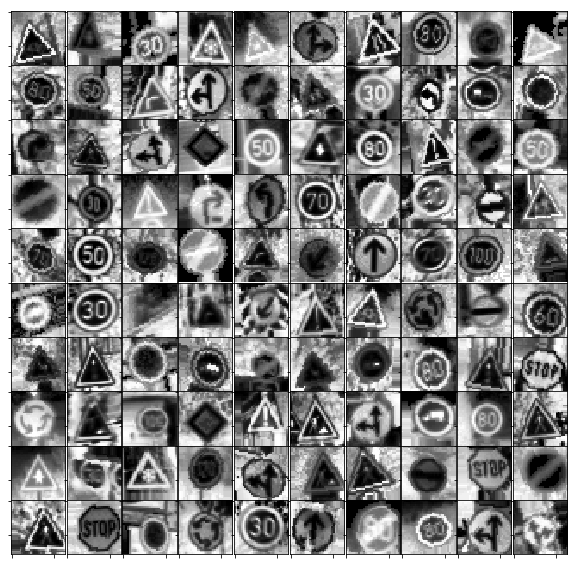

In [12]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def normalize_img(x):
    result = np.zeros_like(x)
    for i in range(x.shape[0]):
        tmp = cv2.cvtColor(x[i], cv2.COLOR_BGR2YCR_CB)
        tmp[:,:,0] = cv2.equalizeHist(tmp[:,:,0])
        dst = cv2.cvtColor(tmp, cv2.COLOR_YCR_CB2BGR)
        result[i] = dst
    return result

def normalize_img_tmp(x):
    result = np.zeros_like(x)
    for i in range(x.shape[0]):
        for ch in range(x.shape[3]):
            img = x[i,:,:,ch]
            dst = np.ones_like(img)
            dst = cv2.normalize(img, dst,alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
            result[i, :, :, ch] = dst
    return result

def grayscale_img(x):
    result = np.zeros(shape=(x.shape[0], x.shape[1], x.shape[2]), dtype=np.float32)
    for i in range(x.shape[0]):
        img = x[i,:,:,:]
        dst = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        dst = cv2.equalizeHist(dst)
        result[i, :, :] = dst
        
    return result

def convert_img_to_nn_input(x):
    return (x.reshape(-1, image_size, image_size, 1) -128) / 255


norm_X_train = normalize_img(X_train_augmented)
gray_X_train = grayscale_img(norm_X_train)

norm_X_valid = normalize_img(X_valid)
gray_X_valid = grayscale_img(norm_X_valid)

norm_X_test = normalize_img(X_test)
gray_X_test = grayscale_img(norm_X_test)

rand_indices = np.random.permutation(X_train_augmented.shape[0])
sel = X_train_augmented[rand_indices[0:100], :]
sel_int = norm_X_train[rand_indices[0:100], :]
sel_norm = gray_X_train[rand_indices[0:100], :]

displayData(sel, 32, 32, 3)
displayData(sel_int, 32, 32, 3)
displayData(sel_norm, 32, 32, 1, 'gray_r')

input_X_train = convert_img_to_nn_input(gray_X_train)
input_X_valid = convert_img_to_nn_input(gray_X_valid)
input_X_test = convert_img_to_nn_input(gray_X_test)

In [13]:
def image_transform_pipeline(X_data):
    norm_X_data = normalize_img(X_data)
    gray_X_data = grayscale_img(norm_X_data)
    result = (gray_X_data.reshape(-1, image_size, image_size, 1) -128) / 255
    
    return result

### Model Architecture

#### General architecture

The following class abstracts out the common operations and leaves the implemetation detail to its subclasses.
It provides methods to:

1. Train a network and provide accuracy data of each epoches
2. Predict using the trained network given a set of images
3. Provide top K most likely predictions given a set of images
4. Provide neural network internal state for visualization and study

In [14]:
class NeuralNetworkClassifier:
    
    def __init__(self, rate = 0.001, epochs = 30, batch_size=128, dropout_rate=0, save_dst="./invalid"):
        self.rate = rate
        self.EPOCHS = epochs
        self.BATCH_SIZE = batch_size
        self.save_dst = save_dst
        self.dropout_rate = dropout_rate
        
        (self.graph, self.x, self.y, self.dprate, self.is_training, self.logits, self.layer, self.cross_entropy, self.loss_operation, self.optimizer, self.training_operation, 
        self.correct_prediction, self.accuracy_operation, self.saver) = self.init_graph()
    
    def init_graph(self):
        raise Exception("This is an abstract class.")
    
    def evaluate(self, X_data, y_data):
        sess = tf.get_default_session()
        num_examples = len(X_data)
        total_accuracy = 0
        for offset in range(0, num_examples, self.BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+self.BATCH_SIZE], y_data[offset:offset+self.BATCH_SIZE]
            accuracy = sess.run(self.accuracy_operation, feed_dict={self.x: batch_x, self.y: batch_y, 
                                                                    self.dprate:self.dropout_rate, self.is_training: False})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples
        
    def train(self, input_X_train, y_train_augmented, input_X_valid, y_valid, saveModel=False):
        train_acc_list = []
        valid_acc_list = []
        
        best_validation_accuracy = 0
        
        with tf.Session(graph=self.graph) as sess:
            sess.run(tf.global_variables_initializer())
            num_examples = len(input_X_train)

            print("Training...")
            print()
            for i in range(self.EPOCHS):
                input_X_train, y_train_augmented = shuffle(input_X_train, y_train_augmented)
                for offset in tqdm(range(0, num_examples, self.BATCH_SIZE)):
                    end = offset + self.BATCH_SIZE
                    batch_x, batch_y = input_X_train[offset:end], y_train_augmented[offset:end]
                    sess.run(self.training_operation, feed_dict={self.x: batch_x, self.y: batch_y, 
                                                                 self.dprate:self.dropout_rate, 
                                                                 self.is_training: True})

                train_accuracy = self.evaluate(input_X_train, y_train_augmented)
                validation_accuracy = self.evaluate(input_X_valid, y_valid)
                train_acc_list.append(train_accuracy)
                valid_acc_list.append(validation_accuracy)
                print("EPOCH {} ...".format(i+1))
                print("Train Accuracy = {:.3f}, Validation Accuracy = {:.3f}".format(train_accuracy, validation_accuracy))
                print()
                
                if validation_accuracy > best_validation_accuracy:
                    best_validation_accuracy = validation_accuracy
                    if(saveModel):
                        self.saver.save(sess, self.save_dst)
                    #print("Model saved")
            
        return (train_acc_list, valid_acc_list)
    
    def evaluate_testset(self, input_X_test, y_test):
        with tf.Session(graph=self.graph) as sess:
            self.saver.restore(sess, self.save_dst)

            test_accuracy = self.evaluate(input_X_test, y_test)
            print("Test Accuracy = {:.3f}".format(test_accuracy))
            
    def predict(self, X_data):
        with tf.Session(graph=self.graph) as sess:
            self.saver.restore(sess, self.save_dst)

            num_examples = len(X_data)
            total_accuracy = 0

            result = np.empty((0,43),dtype='uint8')
            for offset in range(0, num_examples, self.BATCH_SIZE):
                batch_x = X_data[offset:offset+self.BATCH_SIZE]
                tmp = sess.run(tf.nn.softmax(self.logits), feed_dict={self.x: batch_x, 
                                                                      self.dprate:self.dropout_rate, 
                                                                      self.is_training: False})
                result = np.append(result, tmp, axis=0)

        return np.argmax(result, axis=1)

    def topKPrediction(self, X_data, K):
        with tf.Session(graph=self.graph) as sess:
            self.saver.restore(sess, self.save_dst)
            num_examples = len(X_data)
            total_accuracy = 0

            result = np.empty((0,5),dtype='uint8')

            result = None
            for offset in range(0, num_examples, self.BATCH_SIZE):
                batch_x = X_data[offset:offset+self.BATCH_SIZE]
                tmp = sess.run(tf.nn.top_k(tf.nn.softmax(self.logits), K), feed_dict={self.x: batch_x,
                                                                                      self.dprate:self.dropout_rate, 
                                                                                      self.is_training: False})
                if(result == None):
                    result = tmp
                else:
                    result.append(tmp)

        return result
    
    def outputFeatureMap(self, image_input, layer_no):
        raise Exception('Layer does not exist!')
    
    
    def outputFeatureMap_helper(self, image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
        # Here make sure to preprocess your image_input in a way your network expects
        # with size, normalization, ect if needed
        # image_input =
        # Note: x should be the same name as your network's tensorflow data placeholder variable
        # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
        with tf.Session(graph=self.graph) as sess:
            self.saver.restore(sess, self.save_dst)
            
            activation = tf_activation.eval(session=sess,feed_dict={self.x : image_input,
                                                                    self.dprate:self.dropout_rate,
                                                                    self.is_training: False})
            featuremaps = activation.shape[3]
            plt.figure(plt_num, figsize=(15,30))
            for featuremap in range(featuremaps):
                plt.subplot(18,9, featuremap+1) # sets the number of feature maps to show on each row and column
                plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
                if activation_min != -1 & activation_max != -1:
                    plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
                elif activation_max != -1:
                    plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
                elif activation_min !=-1:
                    plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
                else:
                    plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")


#### LeNet implementation

LeNet-5, a pioneering 7-level convolutional network by LeCun et al. that classifies digits, we have modified the number of output classes from 10 to 43, and use it to predict traffic sign.

Reference: LeCun, Y., Jackel, L. D., Bottou, L., Cortes, C., Denker, J. S., Drucker, H., ... & Vapnik, V. (1995). Learning algorithms for classification: A comparison on handwritten digit recognition. Neural networks: the statistical mechanics perspective, 261, 276.

In [15]:
class LeNetClassifier(NeuralNetworkClassifier):
    
    def __init__(self, rate = 0.001, epochs = 30, batch_size=128, dropout_rate=0):
        NeuralNetworkClassifier.__init__(self, rate, epochs, batch_size, dropout_rate, './lenet')
            
    def init_graph(self):
        graph_lenet = tf.Graph()
        with graph_lenet.as_default():
            def LeNet(x, dropout_rate, is_training):    
                # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
                mu = 0
                sigma = 0.1

                # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
                conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
                conv1_b = tf.Variable(tf.zeros(6))
                conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

                # SOLUTION: Activation.
                conv1 = tf.nn.relu(conv1)
                layer1 = conv1

                # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
                conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

                # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
                conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
                conv2_b = tf.Variable(tf.zeros(16))
                conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

                # SOLUTION: Activation.
                conv2 = tf.nn.relu(conv2)
                layer2 = conv2

                # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
                conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

                # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
                fc0   = flatten(conv2)
                fc0   = tf.layers.dropout(fc0, rate=dropout_rate, training=is_training)

                # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
                fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
                fc1_b = tf.Variable(tf.zeros(120))
                fc1   = tf.matmul(fc0, fc1_W) + fc1_b

                # SOLUTION: Activation.
                fc1    = tf.nn.relu(fc1)
                fc1    = tf.layers.dropout(fc1, rate=dropout_rate, training=is_training)

                # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
                fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
                fc2_b  = tf.Variable(tf.zeros(84))
                fc2    = tf.matmul(fc1, fc2_W) + fc2_b

                # SOLUTION: Activation.
                fc2    = tf.nn.relu(fc2)
                fc2 = tf.layers.dropout(fc2, rate=dropout_rate, training=is_training)

                # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
                fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
                fc3_b  = tf.Variable(tf.zeros(43))
                logits = tf.matmul(fc2, fc3_W) + fc3_b

                return logits, layer1, layer2

            x = tf.placeholder(tf.float32, (None, 32, 32, 1))
            y = tf.placeholder(tf.int32, (None))
            dropout_rate = tf.placeholder(tf.float32)
            is_training = tf.placeholder(tf.bool)
            one_hot_y = tf.one_hot(y, 43)
            
            logits, layer1, layer2 = LeNet(x, dropout_rate, is_training)
            #logits = LeNet(x, False)
            cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
            loss_operation = tf.reduce_mean(cross_entropy)
            optimizer = tf.train.AdamOptimizer(learning_rate = self.rate)
            training_operation = optimizer.minimize(loss_operation)

            correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
            accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            saver = tf.train.Saver()
            
            return (graph_lenet, x, y, dropout_rate, is_training, logits, [layer1, layer2], cross_entropy, loss_operation, optimizer, training_operation,
                   correct_prediction, accuracy_operation, saver)
    
    def outputFeatureMap(self, image_input, layer_no):
        if(layer_no == 1):
            return self.outputFeatureMap_helper(image_input, self.layer[0])
        elif(layer_no == 2):
            return self.outputFeatureMap_helper(image_input, self.layer[1])
        else:
            raise Exception('Layer does not exist!')

#### Multi-scale CNN implementation

Multi-scale CNN, a multi-scale convolutional network by Sermanet and LeCun. that was created as part of the GTSRB competition, we have adopted the proposed structures, and use it to predict traffic sign.

Reference: Sermanet, P., & LeCun, Y. (2011, July). Traffic sign recognition with multi-scale convolutional networks. In Neural Networks (IJCNN), The 2011 International Joint Conference on (pp. 2809-2813). IEEE.

In [16]:
class MsCnnClassifier(NeuralNetworkClassifier):
    
    def __init__(self, rate = 0.3, epochs = 30, batch_size=128, dropout_rate=0):
        NeuralNetworkClassifier.__init__(self, rate, epochs, batch_size, dropout_rate, './mscnn')
            
    def init_graph(self):
        graph_lenet = tf.Graph()
        with graph_lenet.as_default():
            def MsCnn(x, dropout_rate, is_training):    
                # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
                mu = 0
                sigma = 0.1

                # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x108.
                conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 108), mean = mu, stddev = sigma))
                conv1_b = tf.Variable(tf.zeros(108))
                conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

                # SOLUTION: Activation.
                conv1 = tf.nn.relu(conv1)
                layer1 = conv1

                # SOLUTION: Pooling. Input = 28x28x108. Output = 14x14x108.
                conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

                # SOLUTION: Layer 2: Convolutional. Output = 10x10x108.
                conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 108, 108), mean = mu, stddev = sigma))
                conv2_b = tf.Variable(tf.zeros(108))
                conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

                # SOLUTION: Activation.
                conv2 = tf.nn.relu(conv2)
                layer2 = conv2

                # SOLUTION: Pooling. Input = 10x10x108. Output = 5x5x108.
                conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

                # SOLUTION: Flatten. Input = 5x5x108 + 14X14X108. Output = 23868.
                fc0a  = flatten(conv2)
                fc0b  = flatten(conv1)
                fc0 = flatten(tf.concat([fc0a, fc0b], 1))
                
                fc0 = tf.layers.dropout(fc0, rate=dropout_rate, training=is_training)

                # SOLUTION: Layer 3: Fully Connected. Input = 23868. Output = 100. 
                fc1_W = tf.Variable(tf.truncated_normal(shape=(23868, 100), mean = mu, stddev = sigma))
                fc1_b = tf.Variable(tf.zeros(100))
                fc1   = tf.matmul(fc0, fc1_W) + fc1_b

                # SOLUTION: Activation.
                fc1    = tf.nn.relu(fc1)
                fc1 = tf.layers.dropout(fc1, rate=dropout_rate, training=is_training)

                # SOLUTION: Layer 4: Fully Connected. Input = 100. Output = 100.
                fc2_W  = tf.Variable(tf.truncated_normal(shape=(100, 100), mean = mu, stddev = sigma))
                fc2_b  = tf.Variable(tf.zeros(100))
                fc2    = tf.matmul(fc1, fc2_W) + fc2_b

                # SOLUTION: Activation.
                fc2    = tf.nn.relu(fc2)
                fc2 = tf.layers.dropout(fc2, rate=dropout_rate, training=is_training)

                # SOLUTION: Layer 5: Fully Connected. Input = 100. Output = 43.
                fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
                fc3_b  = tf.Variable(tf.zeros(43))
                logits = tf.matmul(fc2, fc3_W) + fc3_b

                return logits, layer1, layer2

            x = tf.placeholder(tf.float32, (None, 32, 32, 1))
            y = tf.placeholder(tf.int32, (None))
            one_hot_y = tf.one_hot(y, 43)
            dropout_rate = tf.placeholder(tf.float32)
            is_training = tf.placeholder(tf.bool)

            logits, layer1, layer2 = MsCnn(x, dropout_rate, is_training)
            cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
            loss_operation = tf.reduce_mean(cross_entropy)
            optimizer = tf.train.AdamOptimizer(learning_rate = self.rate, epsilon=1)
            training_operation = optimizer.minimize(loss_operation)

            correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
            accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            saver = tf.train.Saver()
            
            return (graph_lenet, x, y, dropout_rate, is_training, logits, [layer1, layer2], cross_entropy, loss_operation, optimizer, training_operation,
                   correct_prediction, accuracy_operation, saver)
    
    def outputFeatureMap(self, image_input, layer_no):
        if(layer_no == 1):
            return self.outputFeatureMap_helper(image_input, self.layer[0])
        elif(layer_no == 2):
            return self.outputFeatureMap_helper(image_input, self.layer[1])
        else:
            raise Exception('Layer does not exist!')

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### LeNet implementation

From the lecture video, it reaches 96% of validation accuracy, but I can only at best produce around 90% of validation accuracy and less than 90% test accuracy.

In [17]:
def plot_epoch_accuracy(epochs, train_acc_lst, valid_acc_lst, title):
    plt.figure()
    plt.plot(range(epochs), train_acc_lst, 'rx-', label='Train', )
    plt.plot(range(epochs), valid_acc_lst, 'bx-', label='Validation')
    plt.legend()
    plt.title(title) 
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

In [18]:
def plot_regularization_accuracy(dropout_keep_lst, train_acc_lst, valid_acc_lst):
    plt.figure()
    plt.plot(dropout_keep_lst, train_acc_lst, 'rx-', label='Train', )
    plt.plot(dropout_keep_lst, valid_acc_lst, 'bx-', label='Validation')
    plt.legend()
    plt.title('Accuracy vs dropout rate') 
    plt.xlabel('Dropout rate')
    plt.ylabel('Accuracy')

#### LeNet tuning phase

Dropout rate at: 0.50
Training...



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 183.83it/s]


EPOCH 1 ...
Train Accuracy = 0.578, Validation Accuracy = 0.610



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:06<00:00, 206.17it/s]


EPOCH 2 ...
Train Accuracy = 0.710, Validation Accuracy = 0.730



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:06<00:00, 203.65it/s]


EPOCH 3 ...
Train Accuracy = 0.765, Validation Accuracy = 0.797



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 191.73it/s]


EPOCH 4 ...
Train Accuracy = 0.797, Validation Accuracy = 0.845



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:06<00:00, 200.15it/s]


EPOCH 5 ...
Train Accuracy = 0.816, Validation Accuracy = 0.846



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:06<00:00, 213.57it/s]


EPOCH 6 ...
Train Accuracy = 0.833, Validation Accuracy = 0.878



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 176.91it/s]


EPOCH 7 ...
Train Accuracy = 0.841, Validation Accuracy = 0.872



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 182.74it/s]


EPOCH 8 ...
Train Accuracy = 0.863, Validation Accuracy = 0.901



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 191.99it/s]


EPOCH 9 ...
Train Accuracy = 0.862, Validation Accuracy = 0.900



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:06<00:00, 193.89it/s]


EPOCH 10 ...
Train Accuracy = 0.874, Validation Accuracy = 0.913

Dropout rate at: 0.40
Training...



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 187.82it/s]


EPOCH 1 ...
Train Accuracy = 0.676, Validation Accuracy = 0.723



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 172.87it/s]


EPOCH 2 ...
Train Accuracy = 0.792, Validation Accuracy = 0.854



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 185.56it/s]


EPOCH 3 ...
Train Accuracy = 0.842, Validation Accuracy = 0.892



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 175.32it/s]


EPOCH 4 ...
Train Accuracy = 0.865, Validation Accuracy = 0.913



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 170.28it/s]


EPOCH 5 ...
Train Accuracy = 0.880, Validation Accuracy = 0.920



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 175.96it/s]


EPOCH 6 ...
Train Accuracy = 0.894, Validation Accuracy = 0.934



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 178.75it/s]


EPOCH 7 ...
Train Accuracy = 0.902, Validation Accuracy = 0.938



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 174.59it/s]


EPOCH 8 ...
Train Accuracy = 0.909, Validation Accuracy = 0.945



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 178.00it/s]


EPOCH 9 ...
Train Accuracy = 0.914, Validation Accuracy = 0.938



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 173.86it/s]


EPOCH 10 ...
Train Accuracy = 0.916, Validation Accuracy = 0.950

Dropout rate at: 0.30
Training...



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 175.23it/s]


EPOCH 1 ...
Train Accuracy = 0.757, Validation Accuracy = 0.825



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 186.55it/s]


EPOCH 2 ...
Train Accuracy = 0.858, Validation Accuracy = 0.913



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 183.97it/s]


EPOCH 3 ...
Train Accuracy = 0.889, Validation Accuracy = 0.924



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 187.78it/s]


EPOCH 4 ...
Train Accuracy = 0.918, Validation Accuracy = 0.943



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 183.87it/s]


EPOCH 5 ...
Train Accuracy = 0.930, Validation Accuracy = 0.951



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 184.86it/s]


EPOCH 6 ...
Train Accuracy = 0.935, Validation Accuracy = 0.948



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 186.07it/s]


EPOCH 7 ...
Train Accuracy = 0.941, Validation Accuracy = 0.956



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 169.57it/s]


EPOCH 8 ...
Train Accuracy = 0.945, Validation Accuracy = 0.957



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 170.15it/s]


EPOCH 9 ...
Train Accuracy = 0.950, Validation Accuracy = 0.962



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 179.05it/s]


EPOCH 10 ...
Train Accuracy = 0.952, Validation Accuracy = 0.964

Dropout rate at: 0.10
Training...



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 174.98it/s]


EPOCH 1 ...
Train Accuracy = 0.810, Validation Accuracy = 0.842



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 180.52it/s]


EPOCH 2 ...
Train Accuracy = 0.896, Validation Accuracy = 0.909



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 176.07it/s]


EPOCH 3 ...
Train Accuracy = 0.932, Validation Accuracy = 0.944



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 166.66it/s]


EPOCH 4 ...
Train Accuracy = 0.946, Validation Accuracy = 0.942



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:08<00:00, 162.19it/s]


EPOCH 5 ...
Train Accuracy = 0.957, Validation Accuracy = 0.946



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:08<00:00, 164.65it/s]


EPOCH 6 ...
Train Accuracy = 0.963, Validation Accuracy = 0.950



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 170.60it/s]


EPOCH 7 ...
Train Accuracy = 0.969, Validation Accuracy = 0.961



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 172.13it/s]


EPOCH 8 ...
Train Accuracy = 0.971, Validation Accuracy = 0.961



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 180.51it/s]


EPOCH 9 ...
Train Accuracy = 0.975, Validation Accuracy = 0.959



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 177.09it/s]


EPOCH 10 ...
Train Accuracy = 0.973, Validation Accuracy = 0.955

Dropout rate at: 0.00
Training...



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:08<00:00, 165.04it/s]


EPOCH 1 ...
Train Accuracy = 0.804, Validation Accuracy = 0.840



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:08<00:00, 164.90it/s]


EPOCH 2 ...
Train Accuracy = 0.870, Validation Accuracy = 0.893



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 178.00it/s]


EPOCH 3 ...
Train Accuracy = 0.918, Validation Accuracy = 0.922



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 172.74it/s]


EPOCH 4 ...
Train Accuracy = 0.936, Validation Accuracy = 0.934



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 173.17it/s]


EPOCH 5 ...
Train Accuracy = 0.949, Validation Accuracy = 0.935



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 168.38it/s]


EPOCH 6 ...
Train Accuracy = 0.953, Validation Accuracy = 0.942



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 174.95it/s]


EPOCH 7 ...
Train Accuracy = 0.962, Validation Accuracy = 0.946



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:08<00:00, 163.92it/s]


EPOCH 8 ...
Train Accuracy = 0.968, Validation Accuracy = 0.931



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:08<00:00, 159.90it/s]


EPOCH 9 ...
Train Accuracy = 0.972, Validation Accuracy = 0.941



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 169.87it/s]


EPOCH 10 ...
Train Accuracy = 0.977, Validation Accuracy = 0.951



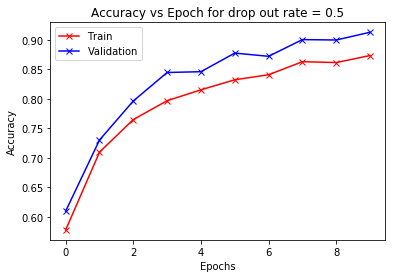

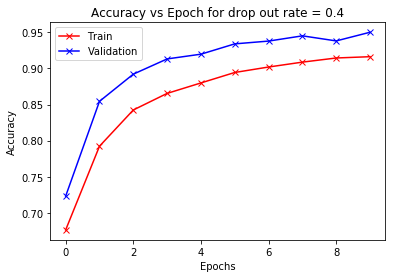

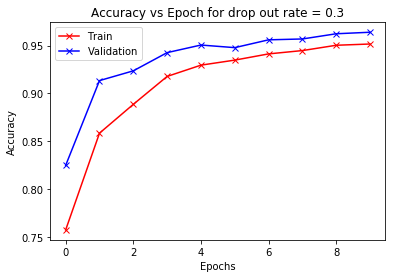

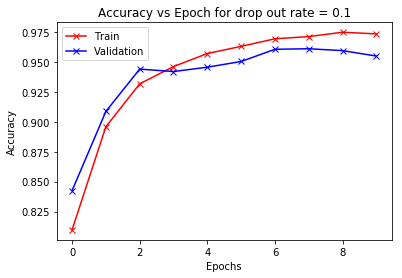

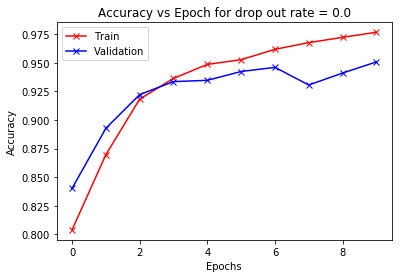

In [20]:
rate = 0.001
epochs = 10
batch_size=128
dropout_rate_lst=[0.5,0.4,0.3,0.1,0]
train_acc_dlst = []
valid_acc_dlst = []

for i in dropout_rate_lst:
    print("Dropout rate at: %.2f" % i)
    lenet = LeNetClassifier(rate, epochs, batch_size, i)
    train_acc_lst, valid_acc_lst = lenet.train(input_X_train, y_train_augmented, input_X_valid, y_valid)
    
    title = "Accuracy vs Epoch for drop out rate = %.1f" % i
    plot_epoch_accuracy(lenet.EPOCHS, train_acc_lst, valid_acc_lst, title)
    train_acc_dlst.append(train_acc_lst[lenet.EPOCHS-1])
    valid_acc_dlst.append(valid_acc_lst[lenet.EPOCHS-1])

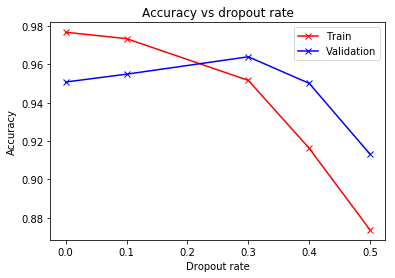

In [21]:
plot_regularization_accuracy(dropout_rate_lst, train_acc_dlst, valid_acc_dlst)

#### LeNet final model

Training...



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 171.82it/s]


EPOCH 1 ...
Train Accuracy = 0.758, Validation Accuracy = 0.812



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 168.83it/s]


EPOCH 2 ...
Train Accuracy = 0.854, Validation Accuracy = 0.909



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 170.40it/s]


EPOCH 3 ...
Train Accuracy = 0.884, Validation Accuracy = 0.928



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:08<00:00, 164.71it/s]


EPOCH 4 ...
Train Accuracy = 0.911, Validation Accuracy = 0.944



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:08<00:00, 163.73it/s]


EPOCH 5 ...
Train Accuracy = 0.922, Validation Accuracy = 0.942



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 168.50it/s]


EPOCH 6 ...
Train Accuracy = 0.934, Validation Accuracy = 0.960



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 174.39it/s]


EPOCH 7 ...
Train Accuracy = 0.941, Validation Accuracy = 0.955



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 171.69it/s]


EPOCH 8 ...
Train Accuracy = 0.943, Validation Accuracy = 0.958



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 172.01it/s]


EPOCH 9 ...
Train Accuracy = 0.950, Validation Accuracy = 0.963



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:08<00:00, 163.96it/s]


EPOCH 10 ...
Train Accuracy = 0.951, Validation Accuracy = 0.963



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:08<00:00, 157.14it/s]


EPOCH 11 ...
Train Accuracy = 0.954, Validation Accuracy = 0.966



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 172.72it/s]


EPOCH 12 ...
Train Accuracy = 0.953, Validation Accuracy = 0.963



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:08<00:00, 162.94it/s]


EPOCH 13 ...
Train Accuracy = 0.953, Validation Accuracy = 0.960



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 169.61it/s]


EPOCH 14 ...
Train Accuracy = 0.960, Validation Accuracy = 0.973



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 172.40it/s]


EPOCH 15 ...
Train Accuracy = 0.960, Validation Accuracy = 0.969



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 176.45it/s]


EPOCH 16 ...
Train Accuracy = 0.961, Validation Accuracy = 0.970



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 174.28it/s]


EPOCH 17 ...
Train Accuracy = 0.960, Validation Accuracy = 0.973



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 170.10it/s]


EPOCH 18 ...
Train Accuracy = 0.962, Validation Accuracy = 0.972



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:08<00:00, 167.30it/s]


EPOCH 19 ...
Train Accuracy = 0.962, Validation Accuracy = 0.972



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:08<00:00, 165.59it/s]


EPOCH 20 ...
Train Accuracy = 0.964, Validation Accuracy = 0.973



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 172.01it/s]


EPOCH 21 ...
Train Accuracy = 0.961, Validation Accuracy = 0.967



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 182.41it/s]


EPOCH 22 ...
Train Accuracy = 0.963, Validation Accuracy = 0.969



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 174.18it/s]


EPOCH 23 ...
Train Accuracy = 0.965, Validation Accuracy = 0.969



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 170.97it/s]


EPOCH 24 ...
Train Accuracy = 0.962, Validation Accuracy = 0.966



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 175.90it/s]


EPOCH 25 ...
Train Accuracy = 0.966, Validation Accuracy = 0.970



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 172.63it/s]


EPOCH 26 ...
Train Accuracy = 0.967, Validation Accuracy = 0.978



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:08<00:00, 166.21it/s]


EPOCH 27 ...
Train Accuracy = 0.967, Validation Accuracy = 0.978



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:08<00:00, 163.07it/s]


EPOCH 28 ...
Train Accuracy = 0.966, Validation Accuracy = 0.975



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 173.64it/s]


EPOCH 29 ...
Train Accuracy = 0.965, Validation Accuracy = 0.972



100%|█████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:07<00:00, 186.11it/s]


EPOCH 30 ...
Train Accuracy = 0.966, Validation Accuracy = 0.974



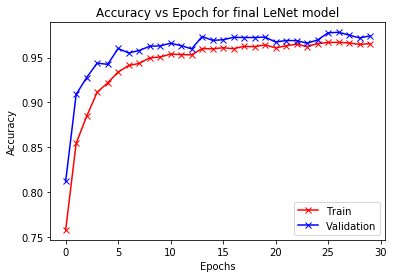

In [22]:
rate = 0.001
epochs = 30
batch_size=128
dropout_rate=0.3

lenet = LeNetClassifier(rate, epochs, batch_size, dropout_rate)
train_acc_lst, valid_acc_lst = lenet.train(input_X_train, y_train_augmented, input_X_valid, y_valid, True)

plot_epoch_accuracy(lenet.EPOCHS, train_acc_lst, valid_acc_lst, "Accuracy vs Epoch for final LeNet model")

In [23]:
lenet.evaluate_testset(input_X_test, y_test)

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.950


#### Multi-scale CNN tuning phase

Dropout rate at: 0.50
Training...



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:19<00:00, 68.81it/s]


EPOCH 1 ...
Train Accuracy = 0.476, Validation Accuracy = 0.542



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 66.38it/s]


EPOCH 2 ...
Train Accuracy = 0.667, Validation Accuracy = 0.628



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 66.23it/s]


EPOCH 3 ...
Train Accuracy = 0.740, Validation Accuracy = 0.697



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:19<00:00, 67.22it/s]


EPOCH 4 ...
Train Accuracy = 0.812, Validation Accuracy = 0.830



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.92it/s]


EPOCH 5 ...
Train Accuracy = 0.870, Validation Accuracy = 0.882



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 66.29it/s]


EPOCH 6 ...
Train Accuracy = 0.892, Validation Accuracy = 0.905



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 66.11it/s]


EPOCH 7 ...
Train Accuracy = 0.911, Validation Accuracy = 0.933



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.05it/s]


EPOCH 8 ...
Train Accuracy = 0.931, Validation Accuracy = 0.936



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.95it/s]


EPOCH 9 ...
Train Accuracy = 0.941, Validation Accuracy = 0.944



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.44it/s]


EPOCH 10 ...
Train Accuracy = 0.927, Validation Accuracy = 0.924

Dropout rate at: 0.40
Training...



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 67.66it/s]


EPOCH 1 ...
Train Accuracy = 0.598, Validation Accuracy = 0.585



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.67it/s]


EPOCH 2 ...
Train Accuracy = 0.822, Validation Accuracy = 0.869



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 66.04it/s]


EPOCH 3 ...
Train Accuracy = 0.899, Validation Accuracy = 0.926



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.90it/s]


EPOCH 4 ...
Train Accuracy = 0.933, Validation Accuracy = 0.952



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.18it/s]


EPOCH 5 ...
Train Accuracy = 0.951, Validation Accuracy = 0.955



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 66.51it/s]


EPOCH 6 ...
Train Accuracy = 0.960, Validation Accuracy = 0.964



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.83it/s]


EPOCH 7 ...
Train Accuracy = 0.965, Validation Accuracy = 0.965



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.90it/s]


EPOCH 8 ...
Train Accuracy = 0.977, Validation Accuracy = 0.976



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.40it/s]


EPOCH 9 ...
Train Accuracy = 0.982, Validation Accuracy = 0.982



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.14it/s]


EPOCH 10 ...
Train Accuracy = 0.976, Validation Accuracy = 0.971

Dropout rate at: 0.30
Training...



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.65it/s]


EPOCH 1 ...
Train Accuracy = 0.749, Validation Accuracy = 0.777



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.79it/s]


EPOCH 2 ...
Train Accuracy = 0.905, Validation Accuracy = 0.941



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 66.18it/s]


EPOCH 3 ...
Train Accuracy = 0.934, Validation Accuracy = 0.955



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 66.40it/s]


EPOCH 4 ...
Train Accuracy = 0.959, Validation Accuracy = 0.966



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.60it/s]


EPOCH 5 ...
Train Accuracy = 0.971, Validation Accuracy = 0.971



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.25it/s]


EPOCH 6 ...
Train Accuracy = 0.982, Validation Accuracy = 0.979



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.06it/s]


EPOCH 7 ...
Train Accuracy = 0.983, Validation Accuracy = 0.973



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.58it/s]


EPOCH 8 ...
Train Accuracy = 0.986, Validation Accuracy = 0.979



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.05it/s]


EPOCH 9 ...
Train Accuracy = 0.989, Validation Accuracy = 0.983



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.81it/s]


EPOCH 10 ...
Train Accuracy = 0.991, Validation Accuracy = 0.981

Dropout rate at: 0.10
Training...



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 61.52it/s]


EPOCH 1 ...
Train Accuracy = 0.879, Validation Accuracy = 0.916



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.44it/s]


EPOCH 2 ...
Train Accuracy = 0.940, Validation Accuracy = 0.946



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.41it/s]


EPOCH 3 ...
Train Accuracy = 0.971, Validation Accuracy = 0.971



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.08it/s]


EPOCH 4 ...
Train Accuracy = 0.982, Validation Accuracy = 0.970



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.36it/s]


EPOCH 5 ...
Train Accuracy = 0.984, Validation Accuracy = 0.965



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.44it/s]


EPOCH 6 ...
Train Accuracy = 0.990, Validation Accuracy = 0.985



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.09it/s]


EPOCH 7 ...
Train Accuracy = 0.993, Validation Accuracy = 0.968



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.63it/s]


EPOCH 8 ...
Train Accuracy = 0.992, Validation Accuracy = 0.979



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.58it/s]


EPOCH 9 ...
Train Accuracy = 0.996, Validation Accuracy = 0.984



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.76it/s]


EPOCH 10 ...
Train Accuracy = 0.995, Validation Accuracy = 0.973

Dropout rate at: 0.00
Training...



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 65.14it/s]


EPOCH 1 ...
Train Accuracy = 0.891, Validation Accuracy = 0.906



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.74it/s]


EPOCH 2 ...
Train Accuracy = 0.957, Validation Accuracy = 0.939



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.63it/s]


EPOCH 3 ...
Train Accuracy = 0.974, Validation Accuracy = 0.959



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 62.04it/s]


EPOCH 4 ...
Train Accuracy = 0.979, Validation Accuracy = 0.964



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.15it/s]


EPOCH 5 ...
Train Accuracy = 0.987, Validation Accuracy = 0.967



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.63it/s]


EPOCH 6 ...
Train Accuracy = 0.986, Validation Accuracy = 0.962



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.07it/s]


EPOCH 7 ...
Train Accuracy = 0.990, Validation Accuracy = 0.965



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.69it/s]


EPOCH 8 ...
Train Accuracy = 0.991, Validation Accuracy = 0.970



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.38it/s]


EPOCH 9 ...
Train Accuracy = 0.992, Validation Accuracy = 0.971



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 61.34it/s]


EPOCH 10 ...
Train Accuracy = 0.994, Validation Accuracy = 0.971



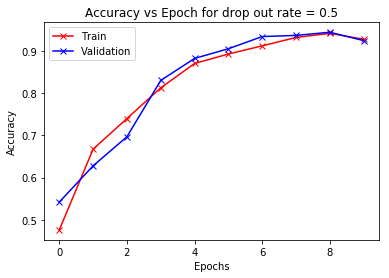

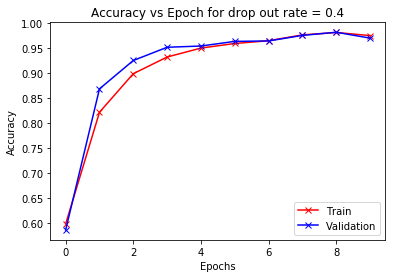

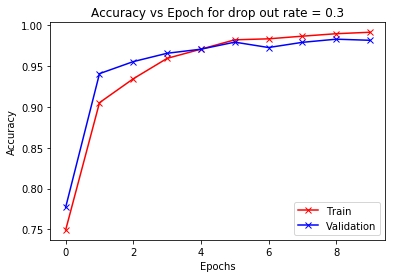

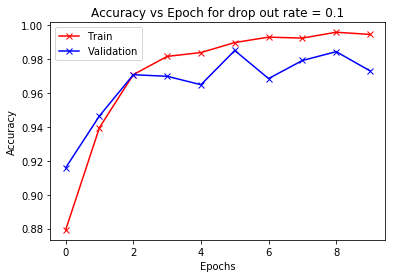

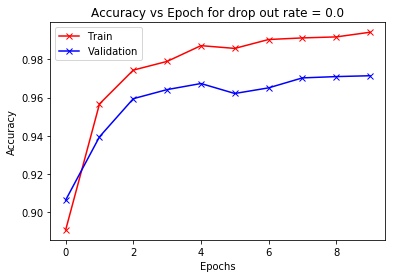

In [24]:
rate = 0.3
epochs = 10
batch_size=128
dropout_rate_lst=[0.5,0.4,0.3,0.1,0]
train_acc_dlst = []
valid_acc_dlst = []

for i in dropout_rate_lst:
    print("Dropout rate at: %.2f" % i)
    mscnn = MsCnnClassifier(rate, epochs, batch_size, i)
    train_acc_lst, valid_acc_lst = mscnn.train(input_X_train, y_train_augmented, input_X_valid, y_valid)
    
    title = "Accuracy vs Epoch for drop out rate = %.1f" % i
    plot_epoch_accuracy(mscnn.EPOCHS, train_acc_lst, valid_acc_lst, title)
    train_acc_dlst.append(train_acc_lst[mscnn.EPOCHS-1])
    valid_acc_dlst.append(valid_acc_lst[mscnn.EPOCHS-1])

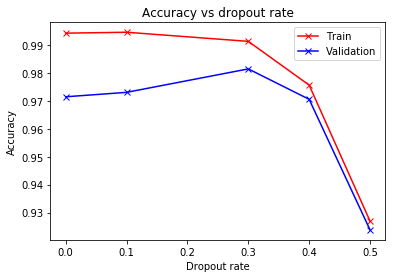

In [25]:
plot_regularization_accuracy(dropout_rate_lst, train_acc_dlst, valid_acc_dlst)

#### Multi-scale CNN final model

In [26]:
rate = 0.3
epochs = 30
batch_size=128
dropout_rate=0.4

mscnn = MsCnnClassifier(rate, epochs, batch_size, dropout_rate)
train_acc_lst, valid_acc_lst = mscnn.train(input_X_train, y_train_augmented, input_X_valid, y_valid, True)

Training...



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.00it/s]


EPOCH 1 ...
Train Accuracy = 0.592, Validation Accuracy = 0.600



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 63.31it/s]


EPOCH 2 ...
Train Accuracy = 0.814, Validation Accuracy = 0.860



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 64.13it/s]


EPOCH 3 ...
Train Accuracy = 0.899, Validation Accuracy = 0.914



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 62.80it/s]


EPOCH 4 ...
Train Accuracy = 0.940, Validation Accuracy = 0.948



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.35it/s]


EPOCH 5 ...
Train Accuracy = 0.957, Validation Accuracy = 0.958



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.73it/s]


EPOCH 6 ...
Train Accuracy = 0.968, Validation Accuracy = 0.966



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.36it/s]


EPOCH 7 ...
Train Accuracy = 0.972, Validation Accuracy = 0.972



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.10it/s]


EPOCH 8 ...
Train Accuracy = 0.978, Validation Accuracy = 0.971



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.95it/s]


EPOCH 9 ...
Train Accuracy = 0.979, Validation Accuracy = 0.977



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 62.90it/s]


EPOCH 10 ...
Train Accuracy = 0.982, Validation Accuracy = 0.976



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.36it/s]


EPOCH 11 ...
Train Accuracy = 0.986, Validation Accuracy = 0.982



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.27it/s]


EPOCH 12 ...
Train Accuracy = 0.988, Validation Accuracy = 0.983



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.59it/s]


EPOCH 13 ...
Train Accuracy = 0.987, Validation Accuracy = 0.978



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.79it/s]


EPOCH 14 ...
Train Accuracy = 0.988, Validation Accuracy = 0.979



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 65.24it/s]


EPOCH 15 ...
Train Accuracy = 0.990, Validation Accuracy = 0.982



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.31it/s]


EPOCH 16 ...
Train Accuracy = 0.992, Validation Accuracy = 0.986



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.60it/s]


EPOCH 17 ...
Train Accuracy = 0.991, Validation Accuracy = 0.982



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.12it/s]


EPOCH 18 ...
Train Accuracy = 0.992, Validation Accuracy = 0.985



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 65.31it/s]


EPOCH 19 ...
Train Accuracy = 0.991, Validation Accuracy = 0.985



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.33it/s]


EPOCH 20 ...
Train Accuracy = 0.994, Validation Accuracy = 0.983



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.08it/s]


EPOCH 21 ...
Train Accuracy = 0.993, Validation Accuracy = 0.979



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 61.47it/s]


EPOCH 22 ...
Train Accuracy = 0.994, Validation Accuracy = 0.982



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 61.92it/s]


EPOCH 23 ...
Train Accuracy = 0.994, Validation Accuracy = 0.988



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.70it/s]


EPOCH 24 ...
Train Accuracy = 0.995, Validation Accuracy = 0.985



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.57it/s]


EPOCH 25 ...
Train Accuracy = 0.995, Validation Accuracy = 0.986



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:21<00:00, 63.59it/s]


EPOCH 26 ...
Train Accuracy = 0.994, Validation Accuracy = 0.979



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.94it/s]


EPOCH 27 ...
Train Accuracy = 0.994, Validation Accuracy = 0.978



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.72it/s]


EPOCH 28 ...
Train Accuracy = 0.996, Validation Accuracy = 0.983



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 64.23it/s]


EPOCH 29 ...
Train Accuracy = 0.996, Validation Accuracy = 0.984



100%|██████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:20<00:00, 65.80it/s]


EPOCH 30 ...
Train Accuracy = 0.994, Validation Accuracy = 0.979



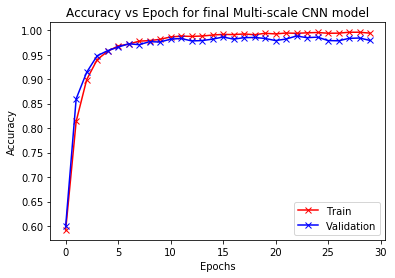

In [27]:
plot_epoch_accuracy(mscnn.EPOCHS, train_acc_lst, valid_acc_lst, "Accuracy vs Epoch for final Multi-scale CNN model")

In [28]:
mscnn.evaluate_testset(input_X_test, y_test)

INFO:tensorflow:Restoring parameters from ./mscnn
Test Accuracy = 0.962


### Confusion matrix and error case study

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### LeNet performance

INFO:tensorflow:Restoring parameters from ./lenet


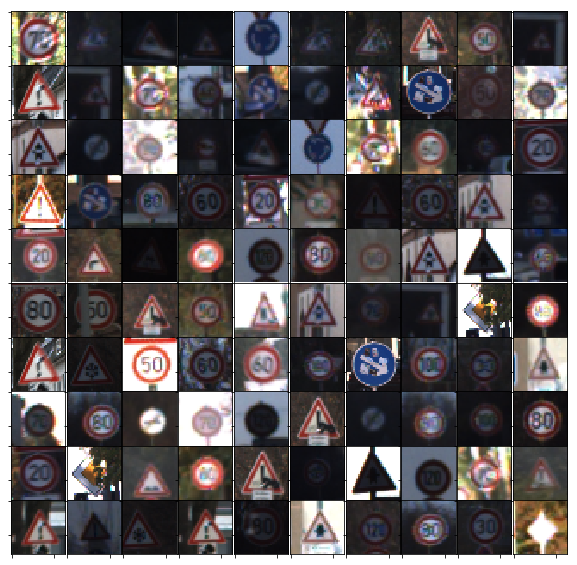

In [30]:
pred_test = lenet.predict(input_X_test)
wrong_pred = X_test[pred_test != y_test]
displayData(wrong_pred[0:100], 32, 32, 3)

Number of incorrectly classified images: 637
Normalized confusion matrix


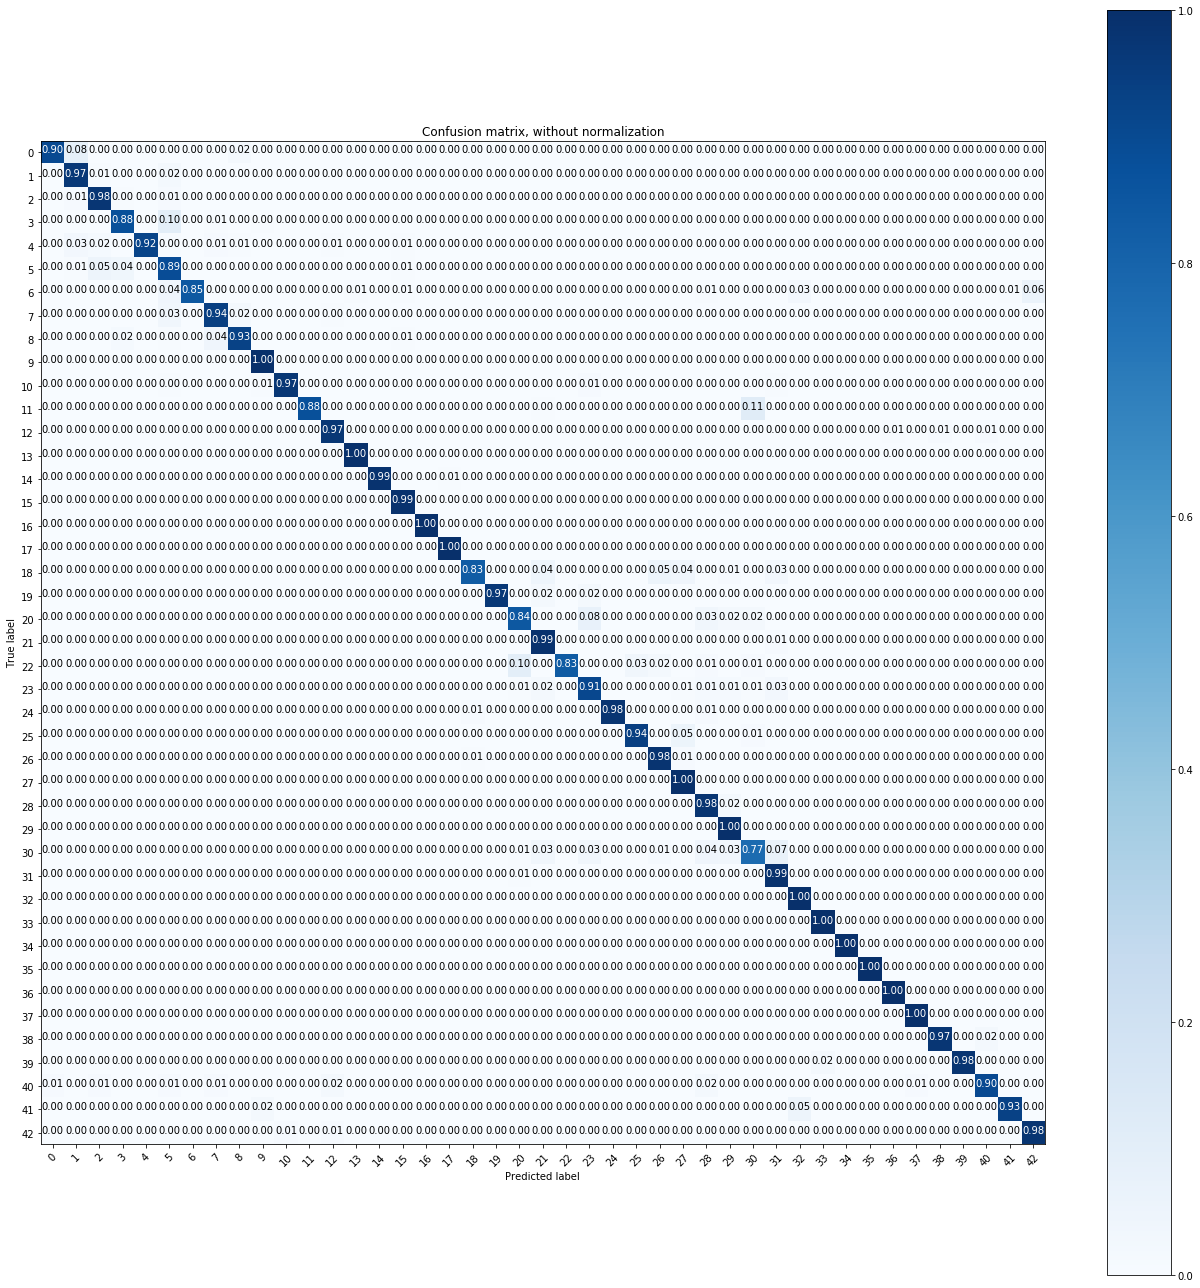

In [31]:
print("Number of incorrectly classified images: %d" % len(wrong_pred))
cnf_matrix = sklearn.metrics.confusion_matrix(y_test, pred_test)
plt.figure(figsize=(18,18))
plot_confusion_matrix(cnf_matrix, classes=signnames, normalize=True,
                      title='Confusion matrix, without normalization')

#### Multi-scale CNN performance

INFO:tensorflow:Restoring parameters from ./mscnn


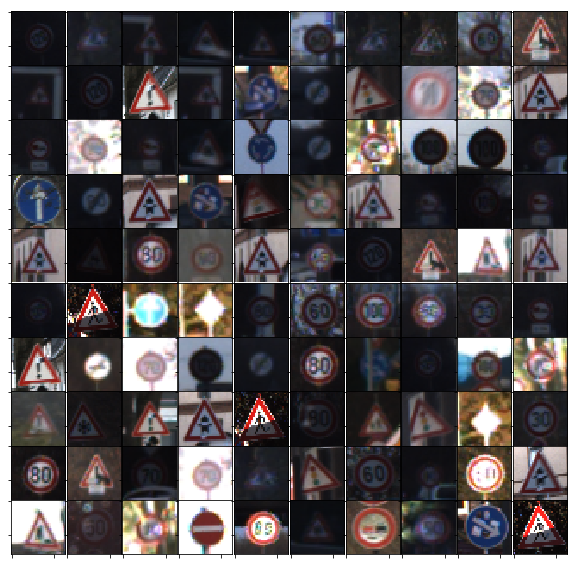

In [32]:
pred_test = mscnn.predict(input_X_test)
wrong_pred = X_test[pred_test != y_test]
displayData(wrong_pred[0:100], 32, 32, 3)

Number of incorrectly classified images: 479
Normalized confusion matrix


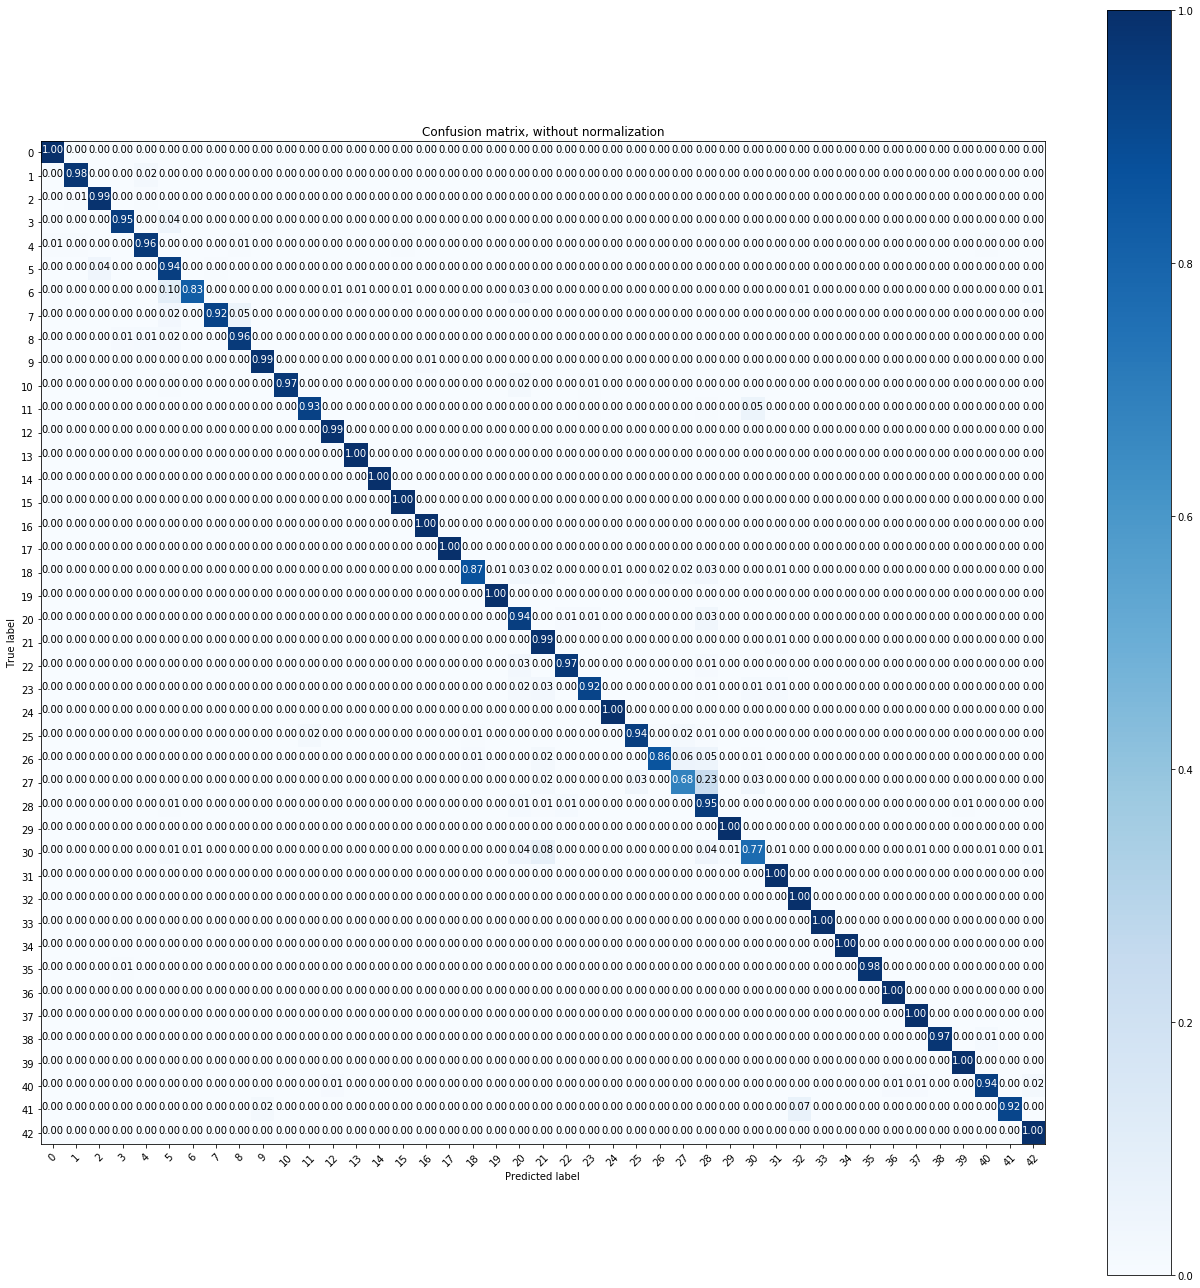

In [33]:
print("Number of incorrectly classified images: %d" % len(wrong_pred))
cnf_matrix = sklearn.metrics.confusion_matrix(y_test, pred_test)

plt.figure(figsize=(18,18))
plot_confusion_matrix(cnf_matrix, classes=signnames, normalize=True,
                      title='Confusion matrix, without normalization')

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

#### Image sources:

I have taken images from the following Youtube video:
 
1. Mercedes E63 AMG Onboard POV German No Speed Limit Highway Autobahn 2014 W212 4Matic V8 Sound - https://www.youtube.com/watch?v=o5crOzMecJY
2. Driving Through (München) Munich Germany - https://www.youtube.com/watch?v=2LXwr2bRNic

I capture images which having traffic signs on them, cut the traffic signs out and scale it to 32 x 32 by hand.

Here is a example image

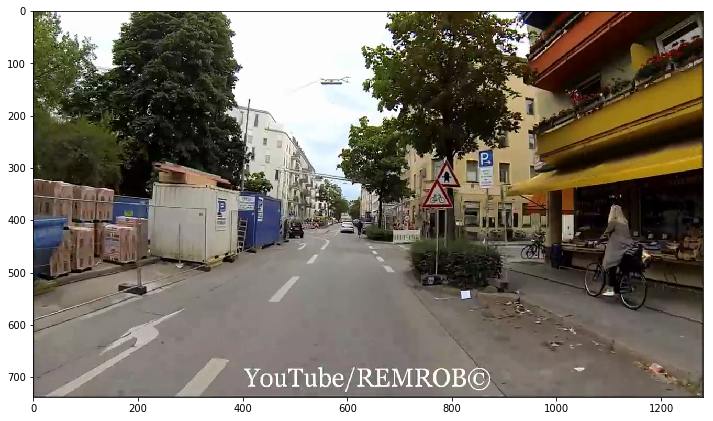

In [34]:
img=mpimg.imread(r'test_input\test_image_parent\test_input_6.png')
plt.figure(figsize=(12,12))
plt.imshow(img)

#### Load and Output the Images

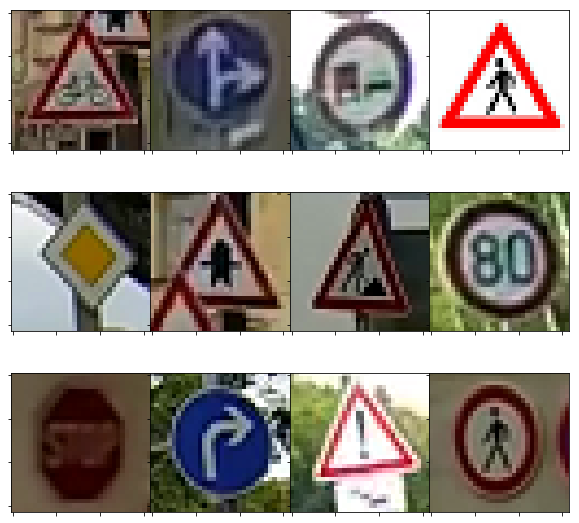

In [35]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
X_test_new = result = np.empty((0,32,32,3),dtype='uint8')
cnt = 0

for file in os.listdir('test_input'):
    if '.png' in file:
        image = mpimg.imread('test_input/' + file)
        image = image[:,:,:3]
        image = image.reshape((1, 32,32,3))
        image = image * 255
        image = image.astype(np.uint8)
        X_test_new = np.append(X_test_new, image, axis=0)
        cnt = cnt+1

displayData(X_test_new, 32, 32, 3)

y_test_new = [29, 36, 10, 27, 12, 11, 25, 5, 14, 33, 18, 27]

### Predict the Sign Type for Each Image

In [36]:
print('actual result: ', y_test_new)

input_X_test_new = image_transform_pipeline(X_test_new)
pred_test_new_lenet = lenet.predict(input_X_test_new)
print('LeNet prediction result: ', pred_test_new_lenet)

input_X_test_new = image_transform_pipeline(X_test_new)
pred_test_new_mscnn = mscnn.predict(input_X_test_new)
print('MsCNN prediction result: ', pred_test_new_mscnn)

actual result:  [29, 36, 10, 27, 12, 11, 25, 5, 14, 33, 18, 27]
INFO:tensorflow:Restoring parameters from ./lenet
LeNet prediction result:  [29 36 10 27 12 11 25  2 14 33 18 37]
INFO:tensorflow:Restoring parameters from ./mscnn
MsCNN prediction result:  [29 36 10 25 12 11 25  5 14 33 18  4]



### Analyze Performance

In [37]:
print('LeNet Accuracy: %.3f' % np.sum((pred_test_new_lenet == y_test_new) / len(pred_test_new_lenet)))
print('MsCNN Accuracy: %.3f' % np.sum((pred_test_new_mscnn == y_test_new) / len(pred_test_new_mscnn)))

LeNet Accuracy: 0.833
MsCNN Accuracy: 0.833


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

#### LeNet Top 5 Softmax Probabilities

INFO:tensorflow:Restoring parameters from ./lenet


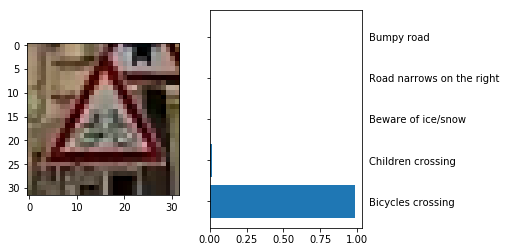

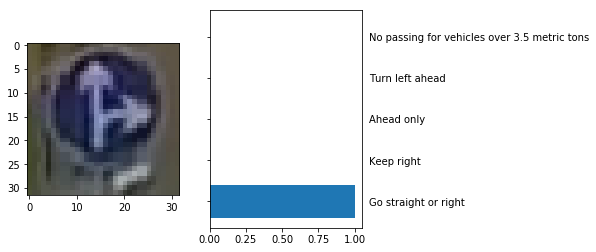

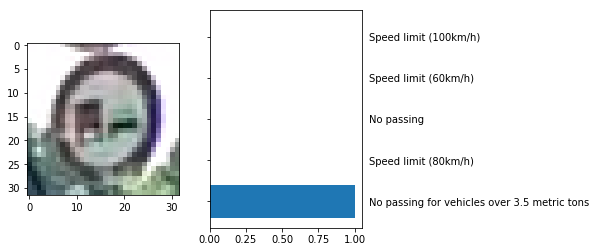

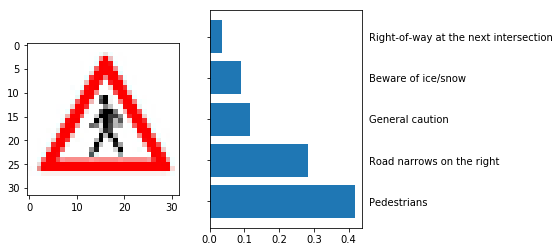

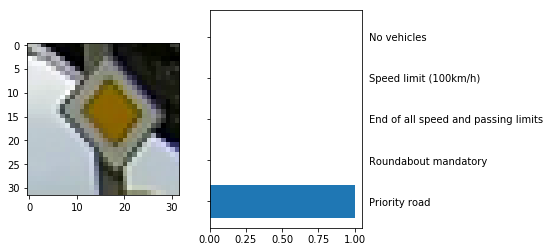

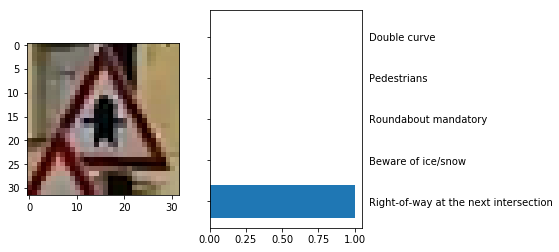

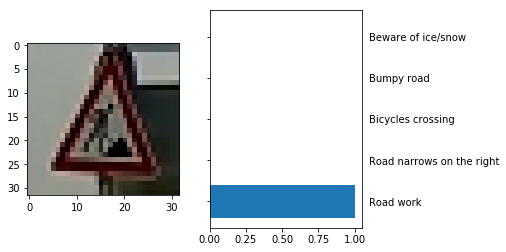

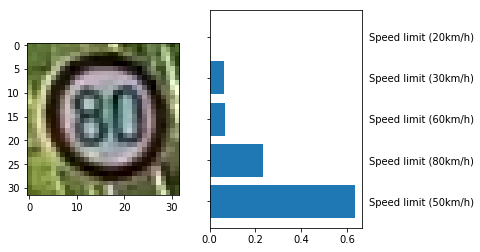

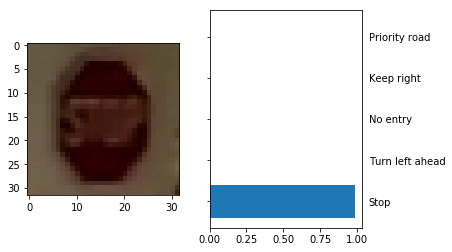

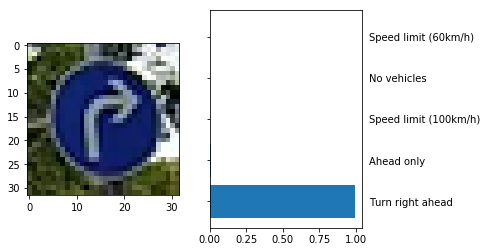

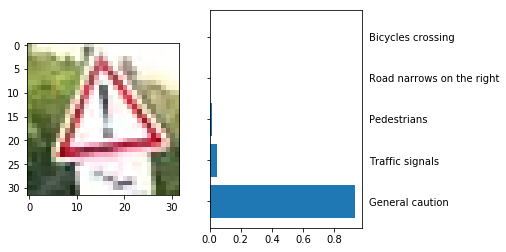

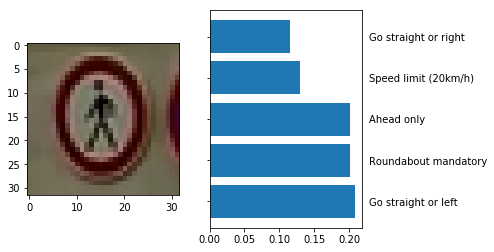

In [38]:
top5_test_new = lenet.topKPrediction(input_X_test_new, 5)

for i in range(len(X_test_new)):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False)
    # last image is not in training set
    ax1.imshow(X_test_new[i])
    ax2.barh(range(5), top5_test_new.values[i], align='center')
    ax2.set_yticks(range(5))
    ax2.set_yticklabels([signnames[top5_test_new.indices[i][0]], signnames[top5_test_new.indices[i][1]], 
                        signnames[top5_test_new.indices[i][2]], signnames[top5_test_new.indices[i][3]], 
                        signnames[top5_test_new.indices[i][4]]])
    ax2.tick_params(labelleft='off' , labelright='on')

#### MsCnn Top 5 Softmax Probabilities

INFO:tensorflow:Restoring parameters from ./mscnn


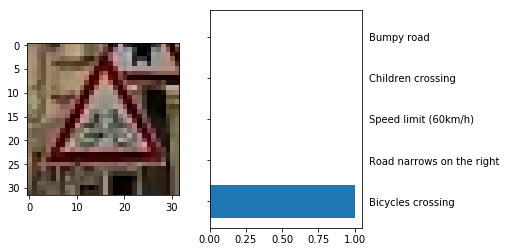

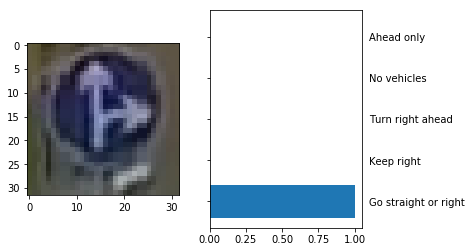

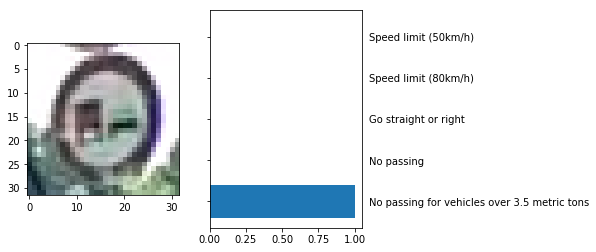

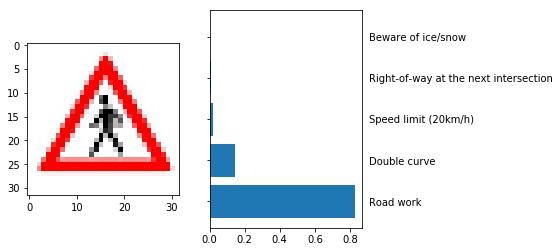

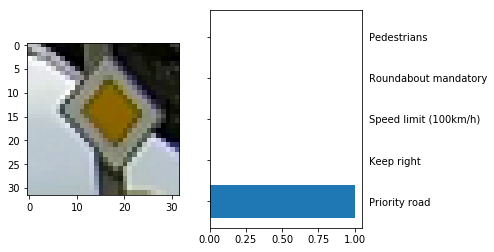

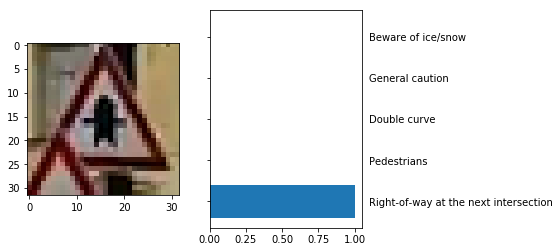

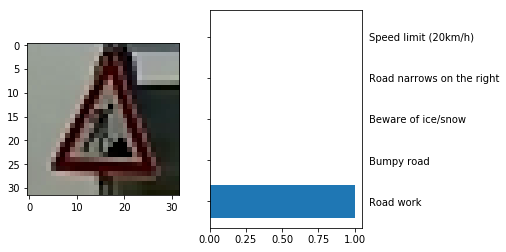

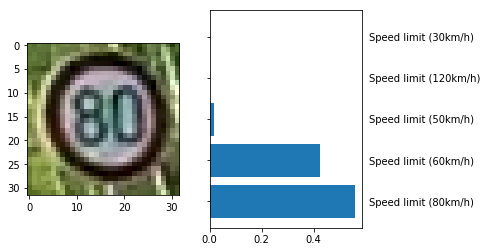

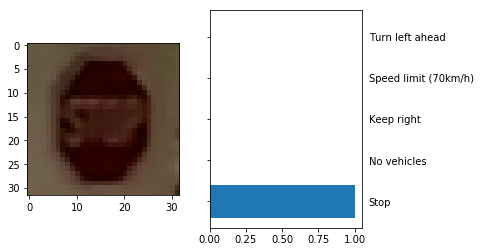

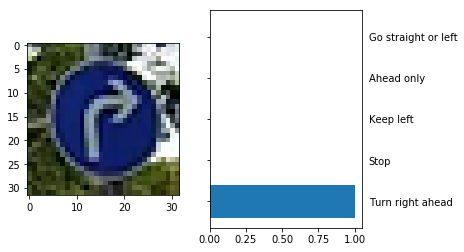

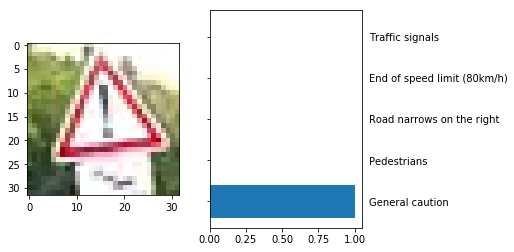

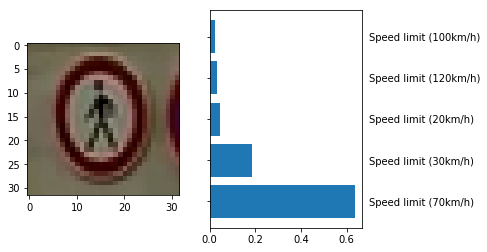

In [39]:
top5_test_new = mscnn.topKPrediction(input_X_test_new, 5)

for i in range(len(X_test_new)):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False)
    # last image is not in training set
    ax1.imshow(X_test_new[i])
    ax2.barh(range(5), top5_test_new.values[i], align='center')
    ax2.set_yticks(range(5))
    ax2.set_yticklabels([signnames[top5_test_new.indices[i][0]], signnames[top5_test_new.indices[i][1]], 
                        signnames[top5_test_new.indices[i][2]], signnames[top5_test_new.indices[i][3]], 
                        signnames[top5_test_new.indices[i][4]]])
    ax2.tick_params(labelleft='off' , labelright='on')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


#### Lenet study

Convolution layer 1
INFO:tensorflow:Restoring parameters from ./lenet


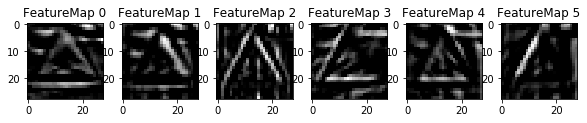

In [40]:
print("Convolution layer 1")

top5_test_new = lenet.outputFeatureMap(input_X_test_new[0].reshape(1, 32, 32, 1), 1)

Convolution layer 2
INFO:tensorflow:Restoring parameters from ./lenet


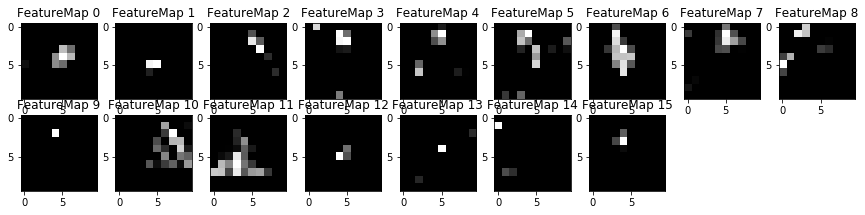

In [41]:
print("Convolution layer 2")

top5_test_new = lenet.outputFeatureMap(input_X_test_new[0].reshape(1, 32, 32, 1), 2)

#### MsCnn study

Convolution layer 1
INFO:tensorflow:Restoring parameters from ./mscnn


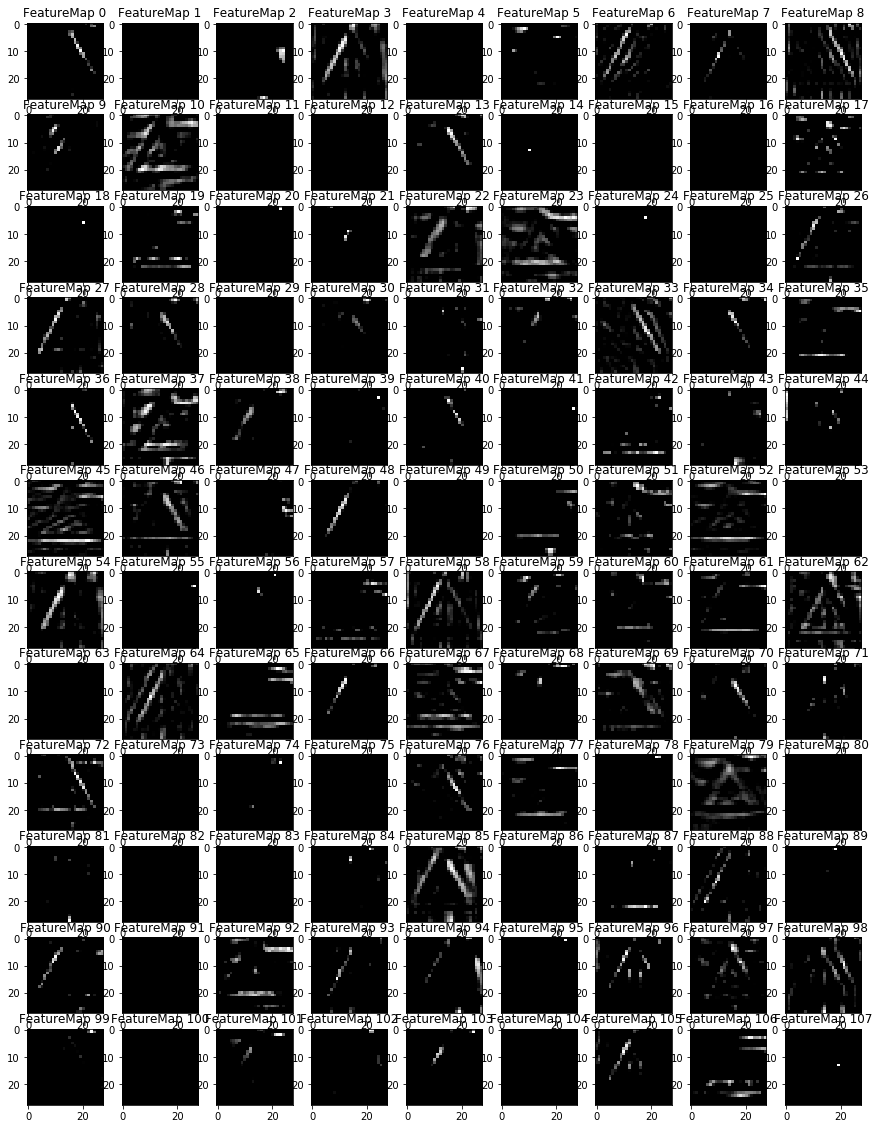

In [42]:
print("Convolution layer 1")

top5_test_new = mscnn.outputFeatureMap(input_X_test_new[0].reshape(1, 32, 32, 1), 1)

Convolution layer 2
INFO:tensorflow:Restoring parameters from ./mscnn


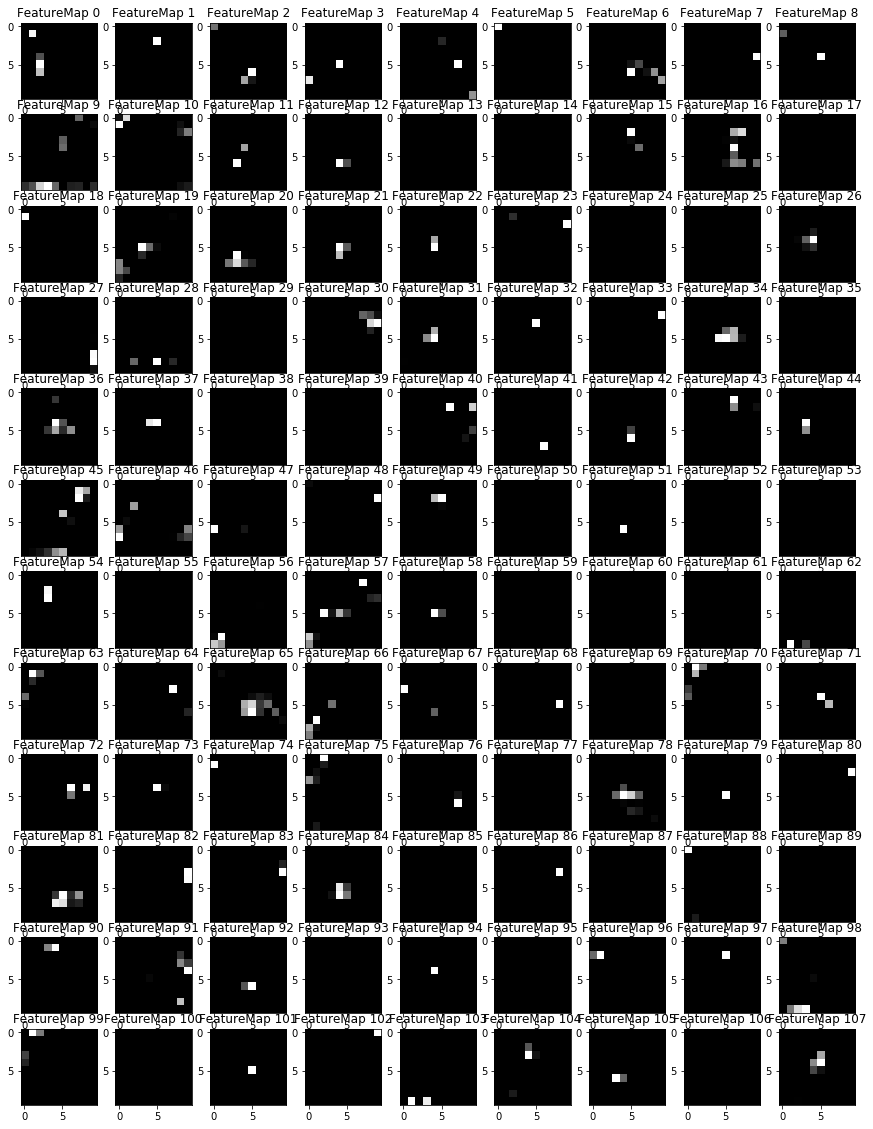

In [43]:
print("Convolution layer 2")

top5_test_new = mscnn.outputFeatureMap(input_X_test_new[0].reshape(1, 32, 32, 1), 2)